# Retail Strategy and Analytics - Task 1

## Loading Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
sns.set()

#for association analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#importing dataset
df_transaction = pd.read_excel('QVI_transaction_data.xlsx')
df_customer = pd.read_csv('QVI_purchase_behaviour.csv')

## Exporatory Data Analysis

### Exploring transaction data

In [3]:
#viewing the dataframe
df_transaction.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [4]:
#fetching dataset info
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [5]:
#checking for null data
df_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [6]:
#checking for duplicated data
df_transaction.duplicated().sum()

1

There are a pair of duplicated data. 

In [7]:
#Viewing duplicated data
df_transaction.loc[df_transaction.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [8]:
#removing duplicated data
df_transaction.drop_duplicates(inplace=True)

#### Looking into chips brand

The focus of data examination is to look at chips data, products that are not chips should be excluded.

In [9]:
#viewing unique entries in the 'PROD_NAMES' column
pd.unique(df_transaction.loc[:,'PROD_NAME'])

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

The product column above need to be in same case. will have to change to uppercase for easier analysis

In [10]:
#changing 'PROD_NAME' columns to upper case
df_transaction.loc[:,'PROD_NAME'] = df_transaction.loc[:,'PROD_NAME'].str.upper()

There are products that are salsas.

In [11]:
#viewing data that are assumed salsa
df_transaction.loc[df_transaction['PROD_NAME'].str.contains('SALSA')]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,OLD EL PASO SALSA DIP TOMATO MILD 300G,1,5.1
25,2019-05-15,39,39144,35506,57,OLD EL PASO SALSA DIP TOMATO MILD 300G,1,5.1
32,2019-05-20,45,45127,41122,64,RED ROCK DELI SR SALSA & MZZRLLA 150G,2,5.4
44,2018-08-18,56,56013,50090,39,SMITHS CRINKLE CUT TOMATO SALSA 150G,1,2.6
63,2019-05-15,82,82480,82047,101,DORITOS SALSA MEDIUM 300G,1,2.6
...,...,...,...,...,...,...,...,...
264675,2019-04-20,265,265103,263419,59,OLD EL PASO SALSA DIP TOMATO MED 300G,1,5.1
264678,2019-03-30,265,265111,263428,35,WOOLWORTHS MILD SALSA 300G,1,1.5
264719,2018-10-28,266,266278,264104,39,SMITHS CRINKLE CUT TOMATO SALSA 150G,1,2.6
264734,2019-01-11,267,267324,264374,41,DORITOS SALSA MILD 300G,1,2.6


An eyeballing of data above shows there are products that can be chips, it is just that these chips are 'salsa' flavored. It will be more practical to just drop these data.

In [12]:
#removing data that contains 'salsa'
df_transaction = df_transaction.loc[~df_transaction['PROD_NAME'].str.contains('SALSA')]

#### Checking basic stats on data

In [13]:
#checking statistical data on the dataframe
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246741,246741.000000,2.467410e+05,2.467410e+05,246741.000000,246741.000000,246741.000000
mean,2018-12-30 01:19:32.745510656,135.051212,1.355311e+05,1.351312e+05,56.351835,1.908061,7.321328
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756900e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351840e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026540e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787231,8.071542e+04,7.814786e+04,33.695488,0.659832,3.077833


There is an outlier data where PROD_QTY is 200.

In [14]:
#Checking data with 200 units of chip bought
df_transaction.loc[df_transaction['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,DORITO CORN CHP SUPREME 380G,200,650.0
69763,2019-05-20,226,226000,226210,4,DORITO CORN CHP SUPREME 380G,200,650.0


Two transactions from the same customer has a purchase of 200 chips each. Purchase only occured twice over a year. 
These data will be removed since we are focusing only on retail purchase only(personal consumption).

In [15]:
#removing outlier customer purchase and checking if any outlier data exist
df_transaction = df_transaction.loc[df_transaction['LYLTY_CARD_NBR'] != 226000]
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246739,246739.000000,2.467390e+05,2.467390e+05,246739.000000,246739.000000,246739.000000
mean,2018-12-30 01:19:29.982856448,135.050474,1.355304e+05,1.351305e+05,56.352259,1.906456,7.316118
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756850e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351820e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030835e+05,2.026525e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.787105,8.071534e+04,7.814774e+04,33.695295,0.342500,2.474901


No more outlier data found.

#### Checking for missing data

Since this is a daily transaction data for a year, it is assumed that there will be a total of 365 days of transactions. We will now check for possible missing days of transactions.

In [16]:
#counting total transactions per day
df_transaction.groupby(['DATE'])['TXN_ID'].count()

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: TXN_ID, Length: 364, dtype: int64

As seen above, there are 364 days of transaction. There is a missing day. To find the missing day, a series containing all days from July 1, 2018 to June 30, 2019 will be created. It will be then plotted to a graph to visually check for the missing date.

In [17]:
#creating days series
dates = pd.date_range(start='2018-7-1', end='2019-6-30', freq='D')
a_year_dates = pd.DataFrame(dates)
a_year_dates.columns = ['DATE']

In [18]:
#create date transaction count by date
df_txn_count = df_transaction.groupby(['DATE'])['TXN_ID'].count().reset_index()

In [19]:
#merge with date
df_txn_count = pd.merge(a_year_dates, df_txn_count, on='DATE', how='left')
df_txn_count.head(3)

,DATE,TXN_ID
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0


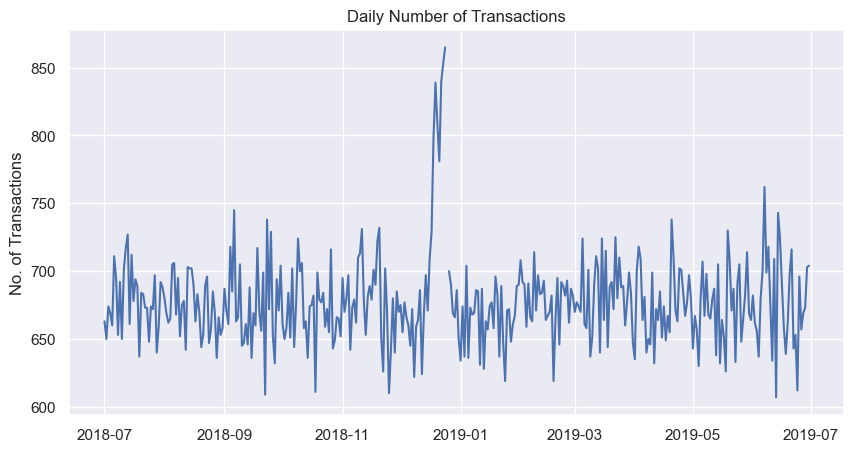

In [20]:
#plotting the number of transactions againts the created date range
plt.figure(figsize=(10,5))
plt.plot(df_txn_count.DATE, df_txn_count.TXN_ID)
plt.title('Daily Number of Transactions')
plt.ylabel('No. of Transactions')
#execute below line to save image
##plt.savefig('Saved_plots/tot_num_transactions.png')
plt.show()


There is a spike in transactions somewhere in December then a discontinuity on data. We will be zooming on those dates.

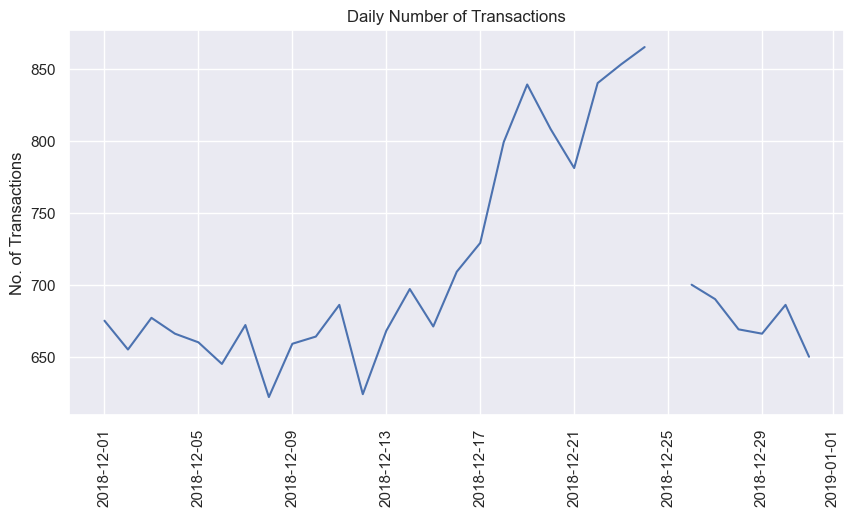

In [21]:
#zooming in to Decemeber
x_dec_slice = df_txn_count.loc[(df_txn_count['DATE'] >= '2018-12-1') & (df_txn_count['DATE'] <= '2018-12-31')]
plt.figure(figsize=(10,5))
plt.plot(x_dec_slice.DATE, x_dec_slice.TXN_ID)
plt.title('Daily Number of Transactions')
plt.ylabel('No. of Transactions')
plt.xticks(rotation=90)
plt.show()

There were no transactions on Christmas day. Mostlikely the stores were closed.

#### Creating additional features

In [22]:
#creating pack size feature
#there are no pack size column in the data, but pack sizes are indicated in the product name. 
#extracting pack sizes from the product names
extracted_packSize = df_transaction.loc[:,'PROD_NAME'].str.extract('(\d+)', expand=False)
extracted_packSize

<>:4: DeprecationWarning: invalid escape sequence '\d'
<>:4: DeprecationWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11328\1102642996.py:4: DeprecationWarning: invalid escape sequence '\d'
  extracted_packSize = df_transaction.loc[:,'PROD_NAME'].str.extract('(\d+)', expand=False)


0         175
1         175
2         170
3         175
4         150
         ... 
264831    175
264832    175
264833    170
264834    150
264835    175
Name: PROD_NAME, Length: 246739, dtype: object

In [23]:
#checking the list of pack sizes using unique function
pd.unique(extracted_packSize)

array(['175', '170', '150', '330', '210', '270', '220', '125', '110',
       '134', '380', '180', '165', '135', '250', '200', '160', '190',
       '90', '70'], dtype=object)

Smallest pack size is 70, while largest is 380

In [24]:
#insert the new column 'PACK_SIZE' to dataframe
df_transaction.insert(6, column='PACK_SIZE', value=extracted_packSize)
df_transaction.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,NATURAL CHIP COMPNY SEASALT175G,175,2,6.0
1,2019-05-14,1,1307,348,66,CCS NACHO CHEESE 175G,175,3,6.3
2,2019-05-20,1,1343,383,61,SMITHS CRINKLE CUT CHIPS CHICKEN 170G,170,2,2.9


After inserting pack sizes into data, we will now check the distribution of purchases per pack size

In [25]:
#before proceeding to histogram plot, pack size columns must be converted to numerical value
df_transaction.loc[:, 'PACK_SIZE'] = pd.to_numeric(df_transaction.loc[:,'PACK_SIZE'])

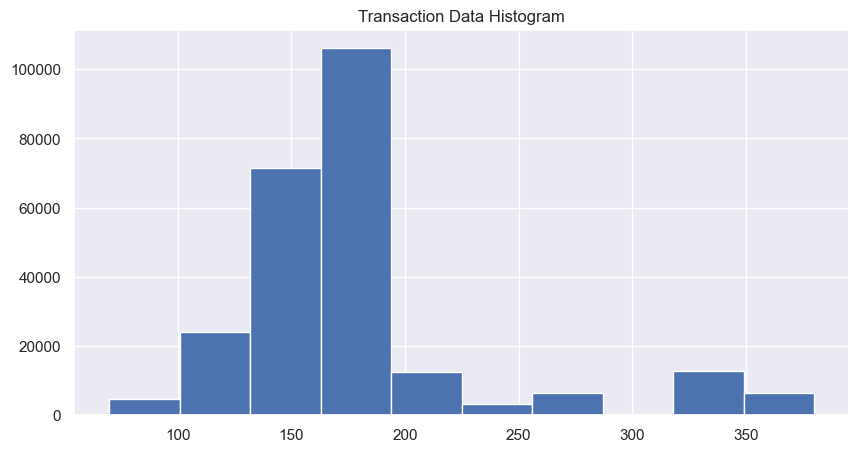

In [26]:
#plotting histogram
plt.figure(figsize=(10,5))
plt.hist(df_transaction.PACK_SIZE)
plt.title('Transaction Data Histogram')
plt.show()

In [27]:
#### Extracting Brand Names
brand = df_transaction.loc[:,'PROD_NAME'].str.split(' ').str.get(0)
brand.head(3)

0    NATURAL
1        CCS
2     SMITHS
Name: PROD_NAME, dtype: object

In [28]:
#inserting brand into dataframe
df_transaction.insert(4, column='BRAND', value=brand)
df_transaction.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,BRAND,PROD_NBR,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,NATURAL,5,NATURAL CHIP COMPNY SEASALT175G,175,2,6.0
1,2019-05-14,1,1307,348,CCS,66,CCS NACHO CHEESE 175G,175,3,6.3
2,2019-05-20,1,1343,383,SMITHS,61,SMITHS CRINKLE CUT CHIPS CHICKEN 170G,170,2,2.9


In [29]:
#checking unique brand names
pd.unique(df_transaction.loc[:,'BRAND'])

array(['NATURAL', 'CCS', 'SMITHS', 'KETTLE', 'GRAIN', 'DORITOS',
       'TWISTIES', 'WW', 'THINS', 'BURGER', 'NCC', 'CHEEZELS', 'INFZNS',
       'RED', 'PRINGLES', 'DORITO', 'INFUZIONS', 'SMITH', 'GRNWVES',
       'TYRRELLS', 'COBS', 'FRENCH', 'RRD', 'TOSTITOS', 'CHEETOS',
       'WOOLWORTHS', 'SNBTS', 'SUNBITES'], dtype=object)

There are brand names that were named differently. Naming of brands should be unified.

In [30]:
#replacing brands
to_replace = ['RED', 'SNBTS', 'INFZNS', 'WW', 'SMITH', 'NCC', 'DORITO', 'GRAIN']
replacement = ['RRD', 'SUNBITES', 'INFUZIONS', 'WOOLWORTHS', 'SMITHS', 'NATURAL', 'DORITOS', 'GRNWVES']
df_transaction['BRAND'] = df_transaction['BRAND'].replace(to_replace=to_replace, value=replacement)

In [31]:
#checking brands again
pd.unique(df_transaction.loc[:,'BRAND'])

array(['NATURAL', 'CCS', 'SMITHS', 'KETTLE', 'GRNWVES', 'DORITOS',
       'TWISTIES', 'WOOLWORTHS', 'THINS', 'BURGER', 'CHEEZELS',
       'INFUZIONS', 'RRD', 'PRINGLES', 'TYRRELLS', 'COBS', 'FRENCH',
       'TOSTITOS', 'CHEETOS', 'SUNBITES'], dtype=object)

### Exploring customer data

In [32]:
#displaying dataframe
df_customer.head(3)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget


In [33]:
#checking for null data
df_customer.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [34]:
#checking for duplicated data
df_customer.duplicated().sum()

0

In [35]:
#displaying dataframe info
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [36]:
#looking into 'LIFESTAGE' column
pd.unique(df_customer.loc[:,'LIFESTAGE'])

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [37]:
#looking into 'PREMIUM_CUSTOMER' column
pd.unique(df_customer.loc[:,'PREMIUM_CUSTOMER'])

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

No problems found on customer data

#### Merging the data frames

In [38]:
#merging data into new dataframe
df_unified_data = pd.merge(left=df_transaction, right=df_customer, how='left', on='LYLTY_CARD_NBR')
df_unified_data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,BRAND,PROD_NBR,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,NATURAL,5,NATURAL CHIP COMPNY SEASALT175G,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,CCS,66,CCS NACHO CHEESE 175G,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,SMITHS,61,SMITHS CRINKLE CUT CHIPS CHICKEN 170G,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,SMITHS,69,SMITHS CHIP THINLY S/CREAM&ONION 175G,175,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,KETTLE,108,KETTLE TORTILLA CHPSHNY&JLPNO CHILI 150G,150,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [39]:
#checking for nulls after merging
df_unified_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
BRAND               0
PROD_NBR            0
PROD_NAME           0
PACK_SIZE           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

No nulls data after merging.

## Data Analysis

After cleaning preparing the data, we will focus on the following:


    - Total sales by customer life stage and premium level
    - Number of customers per segment
    - Number of chips bought per segment
    - Average chip price per segment

In [40]:
#total sales per customer life stage and premium level
t_sales = df_unified_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
t_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


<Figure size 1500x1000 with 0 Axes>

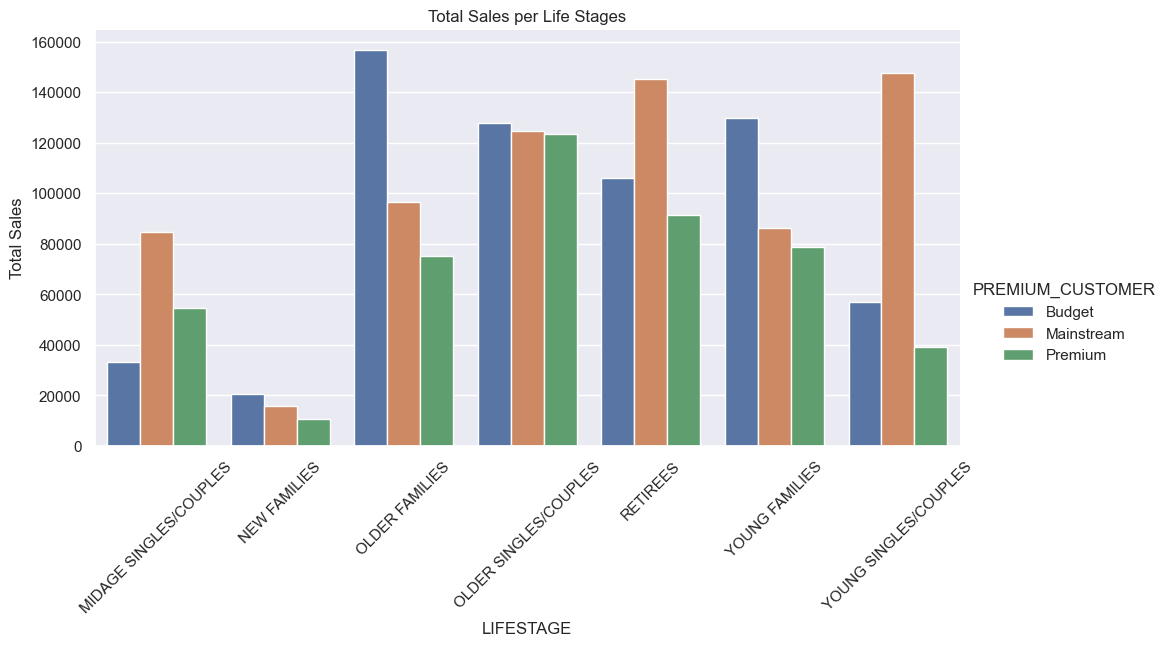

In [41]:
plt.figure(figsize=(15,10))
sns.catplot(data=t_sales, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', kind='bar', aspect=2)
plt.xticks(rotation=45)
plt.title('Total Sales per Life Stages')
plt.ylabel('Total Sales')
plt.show()

More sales are from Budget older families and Mainstream young singles/couples.
We will now look into number of customers

In [42]:
n_cust = df_unified_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
n_cust

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2231
9,OLDER SINGLES/COUPLES,Budget,4849


<Figure size 1500x500 with 0 Axes>

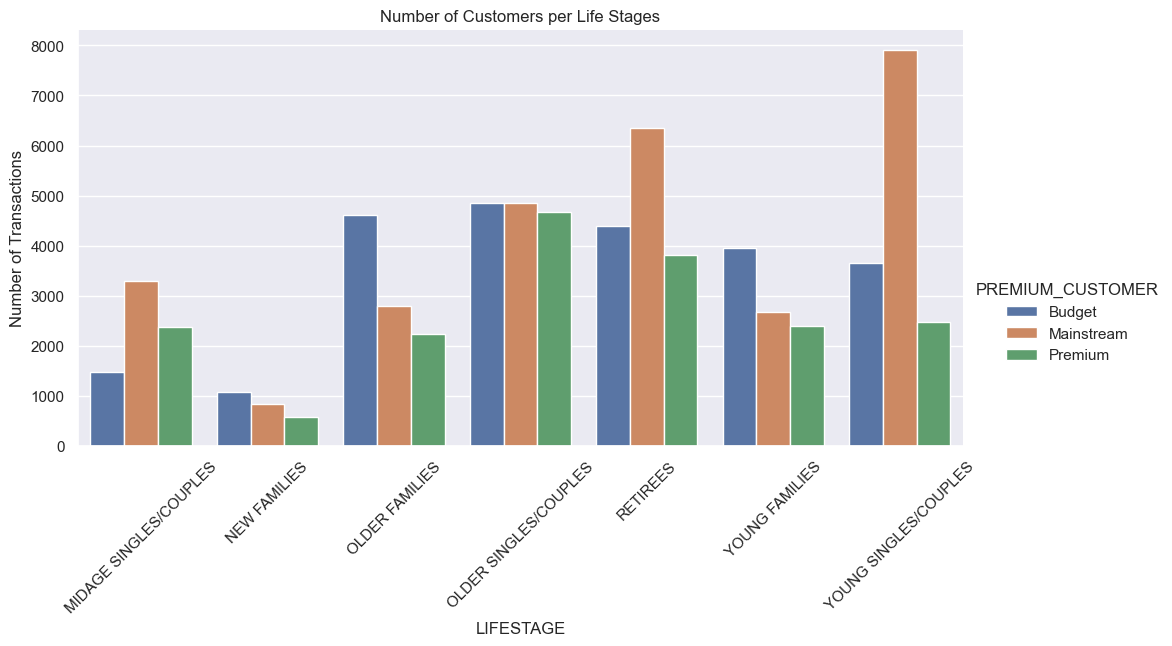

In [43]:
plt.figure(figsize=(15,5))
sns.catplot(data=n_cust, x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER', kind='bar', aspect=2)
plt.xticks(rotation=45)
plt.title('Number of Customers per Life Stages')
plt.ylabel('Number of Transactions')
plt.show()

There are more customers coming from mainstream young single/couples and  retirees.


In [44]:
#finding average unit per customer
ave_unit = df_unified_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).aggregate(PROD_QTY=('PROD_QTY', 'sum'),
                                                                               LYLTY_CARD_NBR=('LYLTY_CARD_NBR', 'nunique')).reset_index()
ave_unit['AVE_UNITS_PER_CUST'] = ave_unit.PROD_QTY / ave_unit.LYLTY_CARD_NBR 
ave_unit

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,LYLTY_CARD_NBR,AVE_UNITS_PER_CUST
0,MIDAGE SINGLES/COUPLES,Budget,8883,1474,6.026459
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,3298,6.432080
2,MIDAGE SINGLES/COUPLES,Premium,14400,2369,6.078514
3,NEW FAMILIES,Budget,5241,1087,4.821527
4,NEW FAMILIES,Mainstream,4060,830,4.891566
5,NEW FAMILIES,Premium,2769,575,4.815652
6,OLDER FAMILIES,Budget,41853,4611,9.076773
7,OLDER FAMILIES,Mainstream,25804,2788,9.255380
8,OLDER FAMILIES,Premium,20239,2231,9.071717
9,OLDER SINGLES/COUPLES,Budget,32883,4849,6.781398


<Figure size 1500x500 with 0 Axes>

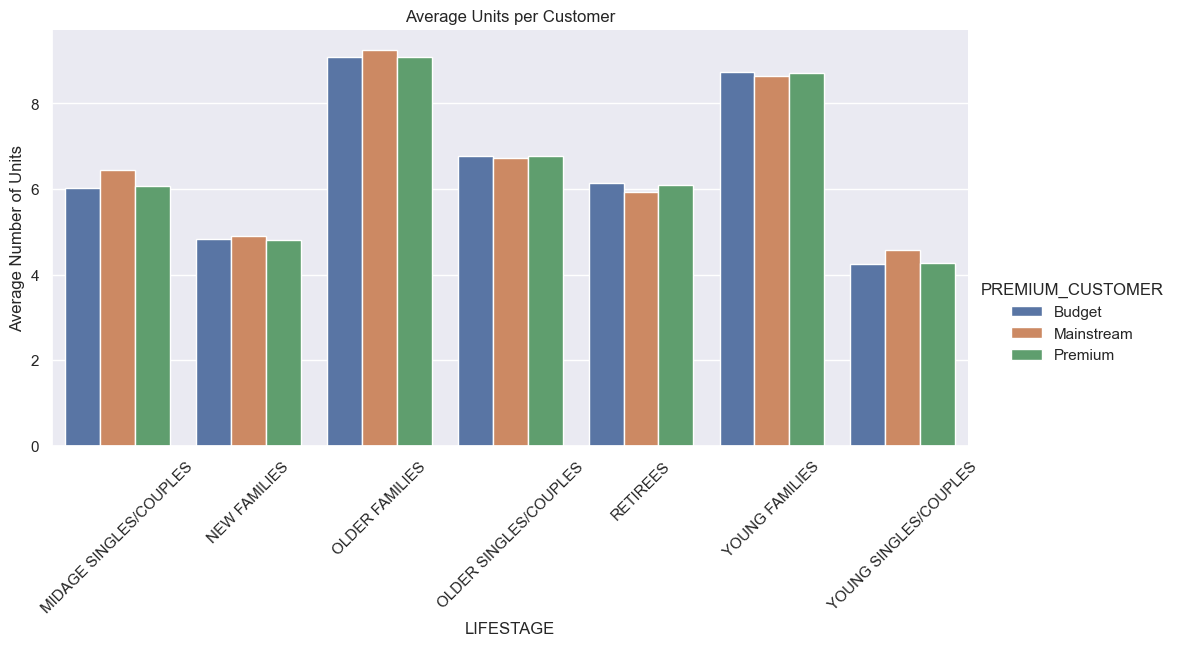

In [45]:
#plotting number of customers
plt.figure(figsize=(15,5))
sns.catplot(data=ave_unit, x='LIFESTAGE', y='AVE_UNITS_PER_CUST', hue='PREMIUM_CUSTOMER', kind='bar', aspect=2)
plt.xticks(rotation=45)
plt.title('Average Units per Customer')
plt.ylabel('Average Number of Units')
plt.show()

Older families and young families tend to buy more chips per customer.

In [46]:
#finding average price per unit by lifestage and customers
ave_price = df_unified_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).aggregate(TOT_SALES=('TOT_SALES', 'sum'),
                                                                               PROD_QTY=('PROD_QTY', 'sum')).reset_index()
ave_price['AVE_PRICE_PER_CUST'] = ave_price.TOT_SALES / ave_price.PROD_QTY
ave_price

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,AVE_PRICE_PER_CUST
0,MIDAGE SINGLES/COUPLES,Budget,33345.70,8883,3.753878
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,21213,3.994449
2,MIDAGE SINGLES/COUPLES,Premium,54443.85,14400,3.780823
3,NEW FAMILIES,Budget,20607.45,5241,3.931969
4,NEW FAMILIES,Mainstream,15979.70,4060,3.935887
5,NEW FAMILIES,Premium,10760.80,2769,3.886168
6,OLDER FAMILIES,Budget,156863.75,41853,3.747969
7,OLDER FAMILIES,Mainstream,96413.55,25804,3.736380
8,OLDER FAMILIES,Premium,75242.60,20239,3.717703
9,OLDER SINGLES/COUPLES,Budget,127833.60,32883,3.887529


<Figure size 1500x500 with 0 Axes>

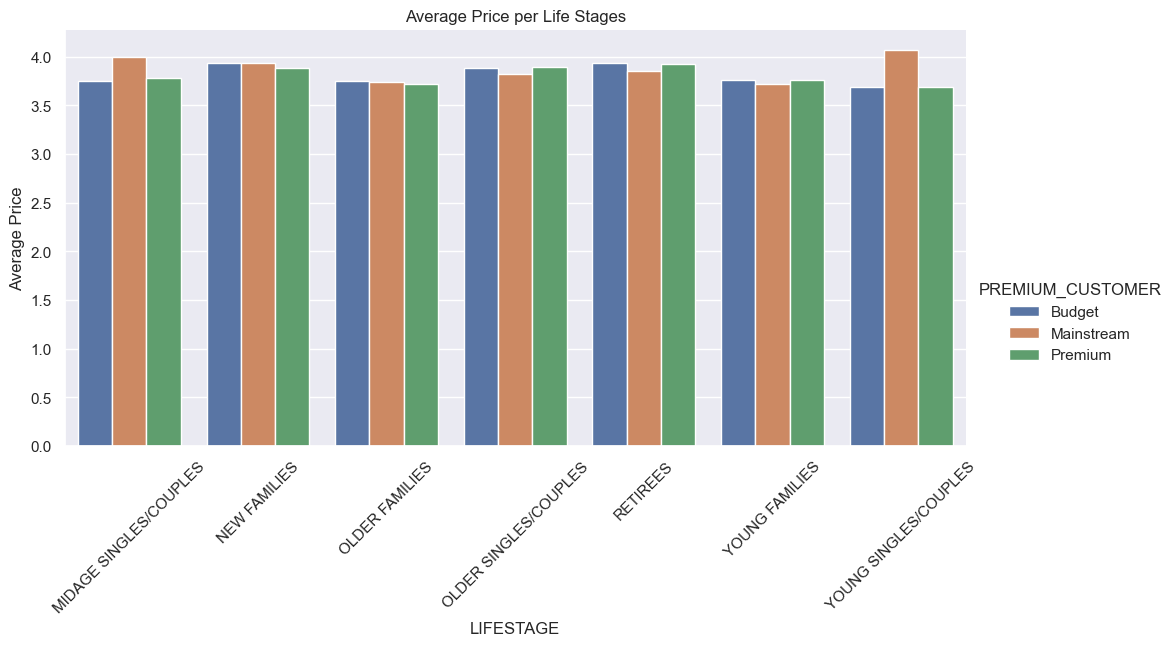

In [47]:
#plotting average price per unit
plt.figure(figsize=(15,5))
sns.catplot(data=ave_price, x='LIFESTAGE', y='AVE_PRICE_PER_CUST', hue='PREMIUM_CUSTOMER', kind='bar', aspect=2)
plt.xticks(rotation=45)
plt.title('Average Price per Life Stages')
plt.ylabel('Average Price')
plt.show()

Mainstream Midage and young singles/couples are willing to pay more per packet of chips

The price per units difference are not noticible different. We will perform stattistical analysis to determine if there is statiscal differences on average unit price.

#### Performing T-Test Between Mainstream vs Premium and Budget midage and young singles/couples

In [48]:
#calculating and adding average price per unit on the unified data
ave_price = df_unified_data.TOT_SALES / df_unified_data.PROD_QTY
df_unified_data.insert(10, column='AVE_PRICE', value=ave_price)

In [49]:
#display data
df_unified_data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,BRAND,PROD_NBR,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,AVE_PRICE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,NATURAL,5,NATURAL CHIP COMPNY SEASALT175G,175,2,6.0,3.00,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,CCS,66,CCS NACHO CHEESE 175G,175,3,6.3,2.10,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,SMITHS,61,SMITHS CRINKLE CUT CHIPS CHICKEN 170G,170,2,2.9,1.45,MIDAGE SINGLES/COUPLES,Budget


In [50]:
#creating data slices
#lifestage slice
df_mid_young = df_unified_data.loc[(df_unified_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (df_unified_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')]

grp_mainstream = df_mid_young.loc[df_mid_young['PREMIUM_CUSTOMER'] == 'Mainstream', 'AVE_PRICE']
grp_prem_bud = df_mid_young.loc[df_mid_young['PREMIUM_CUSTOMER'] != 'Mainstream', 'AVE_PRICE']

In [51]:
#performing t_test
print(ttest_ind(grp_mainstream, grp_prem_bud, equal_var=False, alternative='greater'))


TtestResult(statistic=37.6243885962295, pvalue=3.4836771165090696e-306, df=54791.09392740315)


### Looking into Specific Customer Segment

We would want to delve on mainstream young singles/couples to see what chip brand do this customer segment prefer.

In [52]:
#creating data slice for maintream young singles/couples customer segment(target)
mainstream_seg = df_unified_data.loc[(df_unified_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df_unified_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
mainstream_seg.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,BRAND,PROD_NBR,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,AVE_PRICE,LIFESTAGE,PREMIUM_CUSTOMER
221344,2018-08-16,1,1020,26,SMITHS,19,SMITHS CRINKLE CUT SNAG&SAUCE 150G,150,1,2.6,2.6,YOUNG SINGLES/COUPLES,Mainstream
221345,2018-08-17,1,1163,188,KETTLE,46,KETTLE ORIGINAL 175G,175,1,5.4,5.4,YOUNG SINGLES/COUPLES,Mainstream
221346,2018-08-14,1,1291,333,WOOLWORTHS,27,WW SUPREME CHEESE CORN CHIPS 200G,200,1,1.9,1.9,YOUNG SINGLES/COUPLES,Mainstream


In [53]:
#creating data slice for the other remaining segments
other_seg = df_unified_data.loc[(df_unified_data['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES') & (df_unified_data['PREMIUM_CUSTOMER'] != 'Mainstream')]
other_seg.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,BRAND,PROD_NBR,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,AVE_PRICE,LIFESTAGE,PREMIUM_CUSTOMER
1,2019-05-14,1,1307,348,CCS,66,CCS NACHO CHEESE 175G,175,3,6.3,2.10,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,SMITHS,61,SMITHS CRINKLE CUT CHIPS CHICKEN 170G,170,2,2.9,1.45,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,SMITHS,69,SMITHS CHIP THINLY S/CREAM&ONION 175G,175,5,15.0,3.00,MIDAGE SINGLES/COUPLES,Budget


#### Affinity by Brand

In [54]:
#affinity computation table for target segment
quantity_main_seg = mainstream_seg.loc[:,'PROD_QTY'].sum()
quantity_main_seg_byBrand = mainstream_seg.groupby(['BRAND'])['PROD_QTY'].sum()
quantity_main_seg_byBrand = quantity_main_seg_byBrand.map(lambda x: x/quantity_main_seg).reset_index().rename(columns={'PROD_QTY': 'TARGET_SEG'})
quantity_main_seg_byBrand.head(3)

,BRAND,TARGET_SEG
0,BURGER,0.002926
1,CCS,0.011180
2,CHEETOS,0.008033


In [55]:
#affinity computation table for other segments
quantity_other_seg = other_seg.loc[:,'PROD_QTY'].sum()
quantity_other_seg_byBrand = other_seg.groupby(['BRAND'])['PROD_QTY'].sum()
quantity_other_seg_byBrand = quantity_other_seg_byBrand.map(lambda x: x/quantity_other_seg).reset_index().rename(columns={'PROD_QTY': 'OTHER_SEG'})
quantity_other_seg_byBrand.head(3)

,BRAND,OTHER_SEG
0,BURGER,0.006538
1,CCS,0.018445
2,CHEETOS,0.011759


In [56]:
#merging tables and getting affinity proportions
brand_proportion = pd.merge(left=quantity_main_seg_byBrand, 
                            right=quantity_other_seg_byBrand,
                           how='left',
                           on='BRAND')
brand_proportion['AFFINITY_TO_BRAND'] = brand_proportion.TARGET_SEG / brand_proportion.OTHER_SEG
brand_proportion = brand_proportion.sort_values(by='AFFINITY_TO_BRAND', ascending=False)
brand_proportion

,BRAND,TARGET_SEG,OTHER_SEG,AFFINITY_TO_BRAND
18,TYRRELLS,0.031553,0.025715,1.227016
17,TWISTIES,0.046184,0.037933,1.217496
5,DORITOS,0.122761,0.101172,1.213388
9,KETTLE,0.197985,0.166562,1.188658
16,TOSTITOS,0.045411,0.038351,1.184091
11,PRINGLES,0.119420,0.101111,1.181081
4,COBS,0.044638,0.038449,1.160950
8,INFUZIONS,0.064679,0.057410,1.126613
15,THINS,0.060373,0.057160,1.056209
7,GRNWVES,0.032712,0.031069,1.052887


<Figure size 1000x500 with 0 Axes>

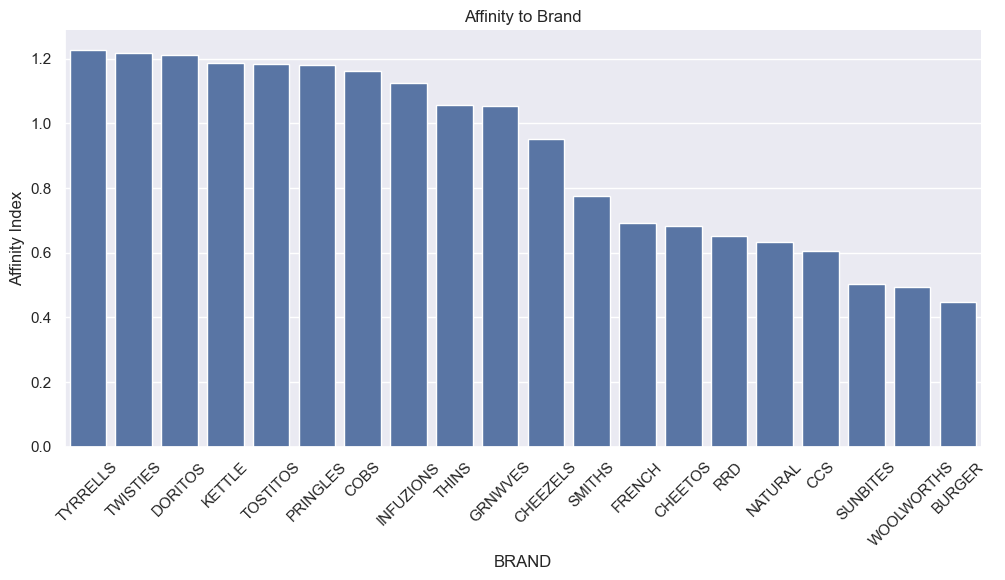

In [57]:
#plotting affinity to brand
plt.figure(figsize=(10,5))
sns.catplot(data=brand_proportion, x='BRAND', y='AFFINITY_TO_BRAND', kind='bar', aspect=2)
plt.title('Affinity to Brand', loc='center')
plt.ylabel('Affinity Index')
plt.xticks(rotation=45)
plt.show()

From the table above, we could see that mainstream young singles/couples are 23% more likely to buy the brand Tyrrells compared to the rest.

#### Affinity by Pack Size

In [58]:
#affinity computation table for target segment
quantity_main_seg_byPack = mainstream_seg.groupby(['PACK_SIZE'])['PROD_QTY'].sum()
quantity_main_seg_byPack = quantity_main_seg_byPack.map(lambda x: x/quantity_main_seg).reset_index().rename(columns={'PROD_QTY': 'TARGET_SEG'})
quantity_main_seg_byPack.head(3)

,PACK_SIZE,TARGET_SEG
0,70,0.003037
1,90,0.006349
2,110,0.106280


In [59]:
#affinity computation table for other segments
quantity_other_seg_byPack = other_seg.groupby(['PACK_SIZE'])['PROD_QTY'].sum()
quantity_other_seg_byPack = quantity_other_seg_byPack.map(lambda x: x/quantity_other_seg).reset_index().rename(columns={'PROD_QTY': 'OTHER_SEG'})
quantity_other_seg_byPack.head(3)

,PACK_SIZE,OTHER_SEG
0,70,0.006284
1,90,0.012613
2,110,0.089576


In [60]:
#merging tables and getting affinity proportions
pack_proportion = pd.merge(left=quantity_main_seg_byPack, 
                            right=quantity_other_seg_byPack,
                           how='left',
                           on='PACK_SIZE')
pack_proportion['AFFINITY_TO_PACK'] = pack_proportion.TARGET_SEG / pack_proportion.OTHER_SEG
pack_proportion = pack_proportion.sort_values(by='AFFINITY_TO_PACK', ascending=False)

#changing 'PACK_SIZE' to string type for plotting purposes
pack_proportion['PACK_SIZE'] = pack_proportion.loc[:,'PACK_SIZE'].astype(str)
pack_proportion

,PACK_SIZE,TARGET_SEG,OTHER_SEG,AFFINITY_TO_PACK
17,270,0.031829,0.025070,1.269599
19,380,0.032160,0.025711,1.250818
18,330,0.061284,0.050975,1.202234
2,110,0.106280,0.089576,1.186483
4,134,0.119420,0.101111,1.181081
14,210,0.029124,0.024892,1.170011
5,135,0.014769,0.012932,1.142078
16,250,0.014355,0.012863,1.115951
9,170,0.080773,0.080348,1.005292
6,150,0.157598,0.163071,0.966441


<Figure size 1000x500 with 0 Axes>

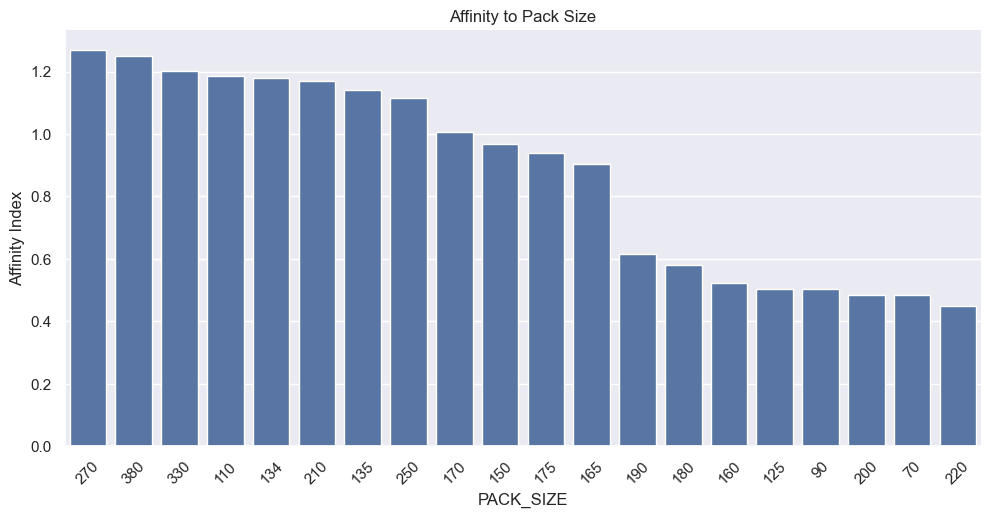

In [61]:
#plotting affinity to pack size
plt.figure(figsize=(10,5))
sns.catplot(data=pack_proportion, x='PACK_SIZE', y='AFFINITY_TO_PACK', kind='bar', aspect=2)
plt.title('Affinity to Pack Size', loc='center')
plt.ylabel('Affinity Index')
plt.xticks(rotation=45)
plt.show()

In terms of pack size, mainstream young singles/couples are 27% more likely to buy chips with pack size of 270g compared tot he rest of the population.

Looking into brands that sells pack size of 270g.

In [62]:
pack_270 = df_unified_data.loc[df_unified_data['PACK_SIZE'] == 270]
pd.unique(pack_270.loc[:, 'BRAND'])

array(['TWISTIES'], dtype=object)

Twisties is that only brand that offers a pack size of 270g. This brand is likely to be bought by the target segment.

## Conclusion

According to the sales data, budget shoppers who are older families, as well as mainstream young singles/couples and retirees have been driving the sales. We found that the reason for high spending on chips among mainstream young singles/couples and retirees is simply because there are more of them compared to other types of buyers. Additionally, mainstream mid-age and young singles/couples are more likely to make impulsive purchases and spend more per packet of chips. 

Our research has also revealed that mainstream young singles/couples are 23% more likely to buy Tyrrells chips compared to other groups. To take advantage of this trend, the Category Manager may want to consider placing some Tyrrells and smaller packs of chips in discretionary space near areas where young singles/couples tend to frequent more often. This would increase visibility and encourage impulse buying behavior, ultimately boosting the category's performance.